In [11]:
import pandas as pd
train_data = pd.read_csv('/content/Train.csv')
test_data = pd.read_excel('/content/test.xlsx')

In [12]:
print("Train Data Head:")
print(train_data.head())

print("\nTest Data Head:")
print(test_data.head())

Train Data Head:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            0.0     Yes         No     1.0           No   
1  5575-GNVDE    Male            0.0      No         No    34.0          Yes   
2  3668-QPYBK    Male            0.0      No         No     2.0          Yes   
3  7795-CFOCW    Male            0.0      No         No    45.0           No   
4  9237-HQITU  Female            0.0      No         No     2.0          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies    

In [13]:
print("\nTrain Data Info:")
print(train_data.info())

print("\nTest Data Info:")
print(test_data.info())



Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5635 entries, 0 to 5634
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5635 non-null   object 
 1   gender            5635 non-null   object 
 2   SeniorCitizen     5628 non-null   float64
 3   Partner           5635 non-null   object 
 4   Dependents        5635 non-null   object 
 5   tenure            5622 non-null   float64
 6   PhoneService      5622 non-null   object 
 7   MultipleLines     5622 non-null   object 
 8   InternetService   5598 non-null   object 
 9   OnlineSecurity    5620 non-null   object 
 10  OnlineBackup      5620 non-null   object 
 11  DeviceProtection  5620 non-null   object 
 12  TechSupport       5620 non-null   object 
 13  StreamingTV       5613 non-null   object 
 14  StreamingMovies   5621 non-null   object 
 15  Contract          5610 non-null   object 
 16  PaperlessBilling  5621 n

 Exploratory Data Analysis (EDA)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Missing values in Train dataset:")
print(train_data.isnull().sum())

print("\nMissing values in Test dataset:")
print(test_data.isnull().sum())

Missing values in Train dataset:
customerID           0
gender               0
SeniorCitizen        7
Partner              0
Dependents           0
tenure              13
PhoneService        13
MultipleLines       13
InternetService     37
OnlineSecurity      15
OnlineBackup        15
DeviceProtection    15
TechSupport         15
StreamingTV         22
StreamingMovies     14
Contract            25
PaperlessBilling    14
PaymentMethod        1
MonthlyCharges      16
TotalCharges         7
Churn                0
dtype: int64

Missing values in Test dataset:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               8
PhoneService        11
MultipleLines       12
InternetService      8
OnlineSecurity       8
OnlineBackup         8
DeviceProtection    10
TechSupport         10
StreamingTV          8
StreamingMovies     15
Contract            15
PaperlessBilling    15
PaymentMethod        8
MonthlyCharges       8
T

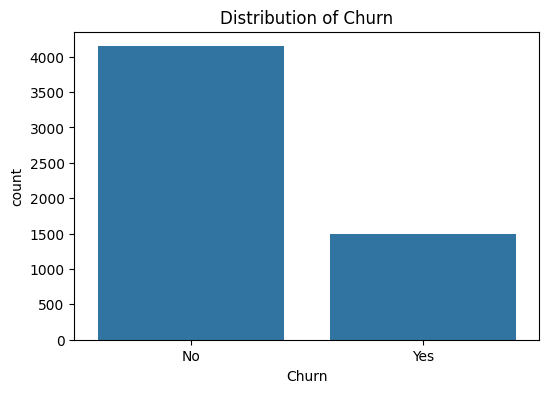

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(data=train_data, x='Churn')
plt.title('Distribution of Churn')
plt.show()
plt.figure(figsize=(10, 6))

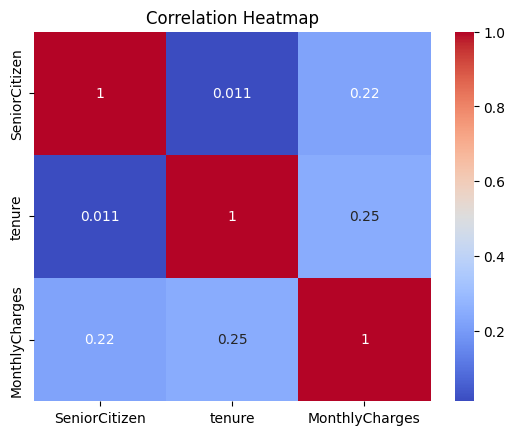

In [16]:
numeric_data = train_data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


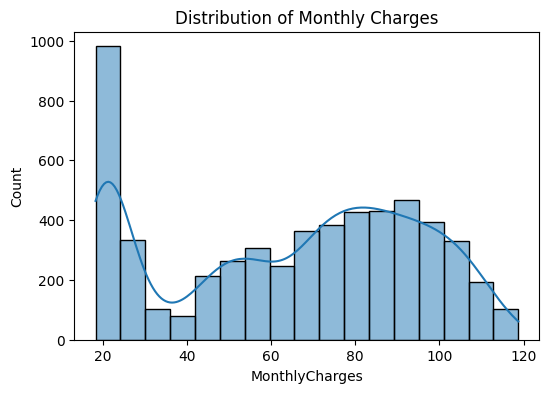

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(train_data['MonthlyCharges'], kde=True)
plt.title('Distribution of Monthly Charges')
plt.show()

Preprocess the data

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
train_data['tenure'] = imputer.fit_transform(train_data[['tenure']])
train_data['MonthlyCharges'] = imputer.fit_transform(train_data[['MonthlyCharges']])
train_data['TotalCharges'] = pd.to_numeric(train_data['TotalCharges'], errors='coerce')  # Convert TotalCharges to numeric
train_data['TotalCharges'] = imputer.fit_transform(train_data[['TotalCharges']])

categorical_columns = train_data.select_dtypes(include='object').columns
for col in categorical_columns:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)

label_encoder = LabelEncoder()
for col in categorical_columns:
    train_data[col] = label_encoder.fit_transform(train_data[col])

scaler = StandardScaler()
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
train_data[numeric_columns] = scaler.fit_transform(train_data[numeric_columns])

X = train_data.drop(['Churn', 'customerID'], axis=1)
y = train_data['Churn']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in y_train:", y_train.isnull().sum())

X_train = X_train.dropna()
y_train = y_train.dropna()

print("Missing values in X_train after dropping:", X_train.isnull().sum().sum())
print("Missing values in y_train after dropping:", y_train.isnull().sum())

Missing values in X_train: 4
Missing values in y_train: 0
Missing values in X_train after dropping: 0
Missing values in y_train after dropping: 0


In [19]:
numeric_data = train_data.select_dtypes(include=['number'])
train_data.fillna(numeric_data.median(), inplace=True)

In [20]:
print(train_data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


machine learning model

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Create X_test and y_test


imputer = SimpleImputer(strategy='mean')

numerical_cols = X_train.select_dtypes(include=['number']).columns
for col in numerical_cols:
    X_train[col] = imputer.fit_transform(X_train[[col]])
    X_test[col] = imputer.transform(X_test[[col]])


categorical_cols = X_train.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X_train[col] = X_train[col].fillna(X_train[col].mode()[0])
    X_test[col] = X_test[col].fillna(X_test[col].mode()[0])

label_encoder = LabelEncoder()
for col in categorical_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7737355811889973
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       822
           1       0.61      0.47      0.53       305

    accuracy                           0.77      1127
   macro avg       0.71      0.68      0.69      1127
weighted avg       0.76      0.77      0.76      1127



Hyperparameter

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_imputed, y_train)

print("\nBest Parameters from Grid Search:")
print(grid_search.best_params_)

best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_val_imputed)

print("\nFinal Model Accuracy:", accuracy_score(y_val, y_pred_best))
print("\nFinal Classification Report:")
print(classification_report(y_val, y_pred_best))


Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Parameters from Grid Search:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Final Model Accuracy: 0.7293700088731144

Final Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       822
           1       0.00      0.00      0.00       305

    accuracy                           0.73      1127
   macro avg       0.36      0.50      0.42      1127
weighted avg       0.53      0.73      0.62      1127



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
